# Change runtime type to R

Remember, the first step when opening a Google Colab notebook is to change the runtime type to R from Python. Our code will not work otherwise!

# New functions

- `check_model()`: A simple function that uses the resulting object from the lm function to visualize the assumptions for our regression model. No other arguments are needed but they change aspects of the plot (using ggplot syntax) if you would like to tweak those.

    - `check_normality()`: Diagnostic test on the resultant `lm()` function object to check for normality of the residuals using the Shapiro-Wilks test.

    - `check_heteroscedasticity()`: Diagnostic test on the resultant `lm()` function object to check for the homoscedasticity assumption using the Preusch-Pagan test.
    
- `r2()`: Returns the coefficient of determination for the resultant `lm()` object model.

- `performance()`: This function is more general than `r2()` but the only statistics we have learned thus far are returned by `r2()`.

# Load the packages and clean the dataset

For this illustration, we will use a made-up dataset with three variables:

1)  (DV) the amount of candy collected during Halloween,

2) (IV1) the age of the child, and

3) (IV2) how good a child's costume was.

In [1]:
## Install easystats package
install.packages("easystats")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘bayestestR’, ‘correlation’, ‘datawizard’, ‘effectsize’, ‘insight’, ‘modelbased’, ‘parameters’, ‘performance’, ‘report’, ‘see’




In [2]:
## Load in the packages
library(tidyverse) ## Several useful functions
library(easystats) ## Several useful functions

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
# Attaching packages: easystats 0.7.4
✔ bayestestR  0.15.2   ✔ correlation 0.8.7 
✔ datawizard  1.0.2    ✔ effectsize  1.0.0 
✔ insight     1.1.0    ✔ modelbased  0.10.0
✔ performance 0.13.0   ✔ parameters  0.24.2
✔ report      0.6.1    ✔ see         0.11.0




In [3]:
## Set the seed so that you will get the same data as me
set.seed(800) ## Boo

## Create some Tricky (but not treat-y) data
TrickyData <-
  data.frame("Candy" = rnorm(n = 250, mean = 35, sd = 7)) %>%
  mutate(Age     = (Candy * -1 + 50) / 2 + rnorm(250, 0, 4),
         Age     = floor(Age),
         Costume = .1 * Candy + rnorm(250, mean = 0, sd = 1),
         Costume = abs(floor(Costume))) %>%
    filter(Age < 18 & Age > 5)

## Examine the data
head(TrickyData, 10) %>% round(2)

,Candy,Age,Costume
,<dbl>,<dbl>,<dbl>
1,41.54,7,5
2,34.65,9,3
3,30.62,8,2
4,28.10,8,1
5,35.95,15,2
6,32.49,8,2
7,32.32,7,3
8,35.04,6,3
9,26.85,13,2


# Descriptive and summary statistics

Descriptive statistics are simple, they are generally the mean and standard deviation of the continuous variables of interest.

We can use many options:

- `summary()` will tell us some simple summary statistics without the standard deviation.

- the `summarize()` function to specify which functions used to summarize the data.

- `describe_distribution()` to compute just about any descriptive statistic we would want.

In [4]:
## Return the descriptive statistics for the variables
describe_distribution(TrickyData)

Variable,Mean,SD,IQR,Min,Max,Skewness,Kurtosis,n,n_Missing
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
Candy,32.946565,6.078867,8.797838,20.30734,47.62339,0.03779836,-0.5914796,148,0
Age,9.777027,3.018809,5.000000,6.00000,17.00000,0.67696970,-0.3062894,148,0
Costume,2.810811,1.191531,2.000000,0.00000,5.00000,0.15268139,-0.7232198,148,0


# Visualize the data

We shall simply visualize our data using a scatterplot with a superimposed regression line (i.e., a line-of-best-fit).

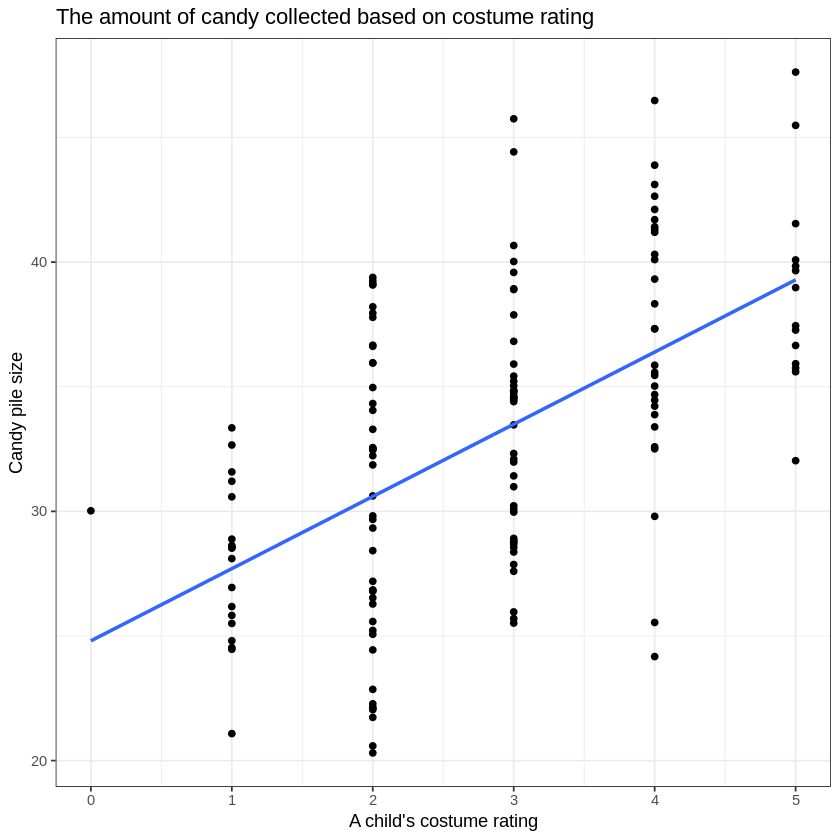

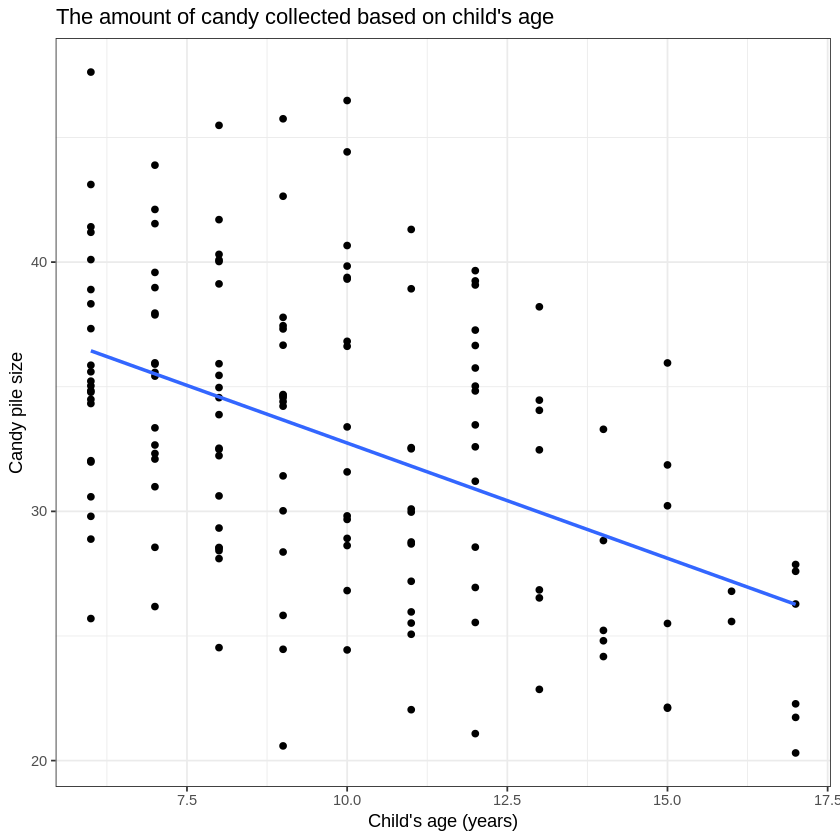

In [5]:
## Generate a scatterplot of the excitement and candy returns with a regression line
TrickyData %>%
  ggplot(aes(x = Costume, y = Candy)) +
  geom_point() + ## Scatterplot geometric object
  geom_smooth(method = "lm", se = FALSE, formula = y ~ x) + ## Add a line-of-best fit
  labs(x = "A child's costume rating",
       y = "Candy pile size",
       title = "The amount of candy collected based on costume rating") +
  theme_bw()

## Generate a scatterplot of the excitement and candy returns with a regression line
TrickyData %>%
  ggplot(aes(x = Age, y = Candy)) +
  geom_point() + ## Scatterplot geometric object
  geom_smooth(method = "lm", se = FALSE, formula = y ~ x) + ## Add a line-of-best fit
  labs(x = "Child's age (years)",
       y = "Candy pile size",
       title = "The amount of candy collected based on child's age") +
  theme_bw()

# Effect of costume rating on the candy collection

Here, we are interested in the dependent variable of the amount of candy received based on the independent variable of a child's costume rating during Halloween.

The regression equation is as follows: $\hat{y}_i = b_0 + b_1*Costume$

In [6]:
## Predicting the amount of candy based on costume scores
ModCostume <- lm(Candy ~ Costume, data = TrickyData)

## Report the estimated model parameters (i.e., slope & intercept)
parameters(ModCostume)

## Return the coefficient of determination
r2(ModCostume)

Parameter,Coefficient,SE,CI,CI_low,CI_high,t,df_error,p
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
(Intercept),24.804598,1.0605459,0.95,22.708593,26.900604,23.388520,146,3.110259e-51
Costume,2.896661,0.3475647,0.95,2.209753,3.583569,8.334163,146,5.261624e-14


# R2 for Linear Regression
       R2: 0.322
  adj. R2: 0.318

## Interpret the regression equation

Filling in the equation with the estimated parameters, we have the following: $\hat{y}_i = 24.8 + 2.9 * Costume$.

*Intercept* (i.e., $b_0$): When costumes are rated 0, we can expect a child to receive about 24.8 pieces of candy.

*Slope* (i.e., $b_1$): For every 1-unit increase in costume ratings, we can expect there to be an _increase_ of 2.9 pieces of candy.

*Effect size* (i.e., $R^2$): The costume ratings account for about 32% (i.e., $R^2 = .32$) of the variability in the amount of candy a child collects.

# Effect of child's age on the candy collection

Here, we are interested in the dependent variable of the amount of candy received based on the independent variable of a child's age during trick-or-treating.

The regression equation is as follows: $\hat{y}_i = b_0 + b_1*Age$

In [7]:
## Predicting the amount of candy based on costume scores
ModAge <- lm(Candy ~ Age, data = TrickyData)

## Report the estimated model parameters (i.e., slope & intercept)
parameters(ModAge)

## Return the coefficient of determination
r2(ModAge)

Parameter,Coefficient,SE,CI,CI_low,CI_high,t,df_error,p
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
(Intercept),41.990012,1.5142658,0.95,38.997300,44.9827249,27.72962,146,4.705414e-60
Age,-0.924969,0.1480299,0.95,-1.217527,-0.6324109,-6.24853,146,4.297129e-09


# R2 for Linear Regression
       R2: 0.211
  adj. R2: 0.206

## Interpret the regression equation

Filling in the equation with the estimated parameters, we have the following: $\hat{y}_i = 41.99 - 0.92 * Age$.

*Intercept* (i.e., $b_0$): At an age of 0, we can expect a child to receive about 41.99 pieces of candy.

*Slope* (i.e., $b_1$): For every 1-unit increase in age, we can expect there to be a _decrease_ of 0.92 pieces of candy.

*Effect size* (i.e., $R^2$): The child's age accounts for about 21% (i.e., $R^2 = .21$) of the variability in the amount of candy a child collects.

# Multiple predictors

What if we were interested in both predictors in the same model with an interaction term? That model would look like the following: $\hat{y}_i = b_0 + b_1 * Costume + b_2 * Age + b_3 * Costume:Age$.

**Terms**

- $b_0$ is the intercept term, where the line of best fit crosses the y-axis when all parameters equal 0.

- $b_1$ is the slope for (i.e., main effect of) costume, which is interpreted as "the expected change in Y given a 1-unit increase in Costume, while holding the other model parameters constant".

- $b_2$ is the slope for (i.e., main effect of) age, which is interpreted as "the expected change in Y given a 1-unit increase in Age, while holding the other model parameters constant".

- $b_3$ is the slope for the interaction of costume and age. Essentially, this parameter is saying that the relationship between candy and costume *depends on* the child's age, which is equivalent to saying that the relationship between candy and age *depends on* the child's costume.

In [8]:
## Estimate the regression model with the two main effects and interactions
ModCostAge <- lm(Candy ~ Costume * Age, data = TrickyData)

## Report the estimated model parameters (i.e., slope & intercept)
parameters(ModCostAge)

## Return the coefficient of determination
r2(ModCostAge)

Parameter,Coefficient,SE,CI,CI_low,CI_high,t,df_error,p
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
(Intercept),32.40445367,3.5956618,0.95,25.2973582,39.5115491,9.0120972,144,1.129916e-15
Costume,2.63830801,1.2099013,0.95,0.2468474,5.0297687,2.1805978,144,3.083699e-02
Age,-0.66005462,0.3537451,0.95,-1.3592583,0.0391491,-1.8659047,144,6.408891e-02
Costume:Age,-0.01575997,0.1260217,0.95,-0.2648513,0.2333314,-0.1250576,144,9.006524e-01


# R2 for Linear Regression
       R2: 0.437
  adj. R2: 0.426

## Interpret the regression equation

Filling in the equation with the estimated parameters, we have the following: $\hat{y}_i = 32.40 + 2.64 * Costume -0.66 * Age - .02 * Costume:Age$.

*Intercept* (i.e., $b_0$: When age and costume are 0, we can expect a child to receive about 32.40 pieces of candy.

*Costume Slope* (i.e., $b_1$): For every 1-unit increase in costume ratings, we can expect there to be an _increase_ of 2.64 pieces of candy *while holding the other parameters constant*.

*Age Slope* (i.e., $b_2$): For every 1-unit increase in age, we can expect there to be a _decrease_ of 0.66 pieces of candy *while holding the other parameters constant*.

*Interaction* (i.e., $b_3$): The effectiveness of costume predicting candt changes by -.02 for every 1-unit increase in age (vice versa). This term is not significant and is very small, we can probably drop it from the model.

*Effect size* (i.e., $R^2$): The set of independent variables--including costume ratings, age, and their interaction--account for about 44% (i.e., $R^2 = .44$) of the variability in the amount of candy a child collects.

# Assumption checking

Here, let's just check our assumptions on the last model we estimated.

Our residuals (i.e., $\hat{y}_i - y_i$) appear to be normally distributed with equal variances (i.e., homoscedasticity) across the range of predicted DV scores.

OK: residuals appear as normally distributed (p = 0.391).


For confidence bands, please install `qqplotr`.



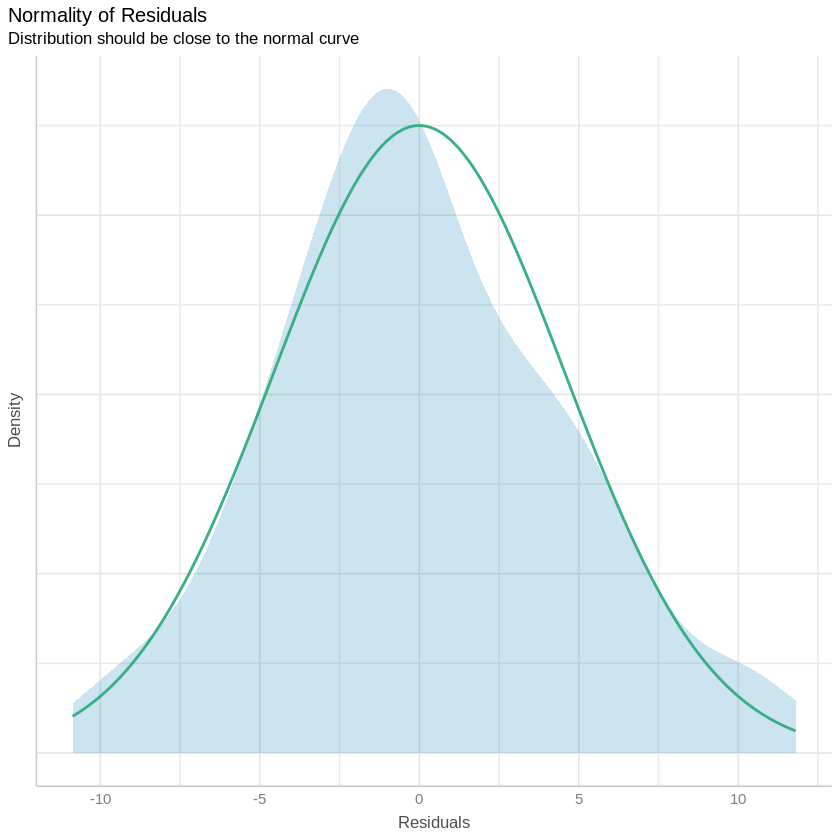

OK: Error variance appears to be homoscedastic (p = 0.901).


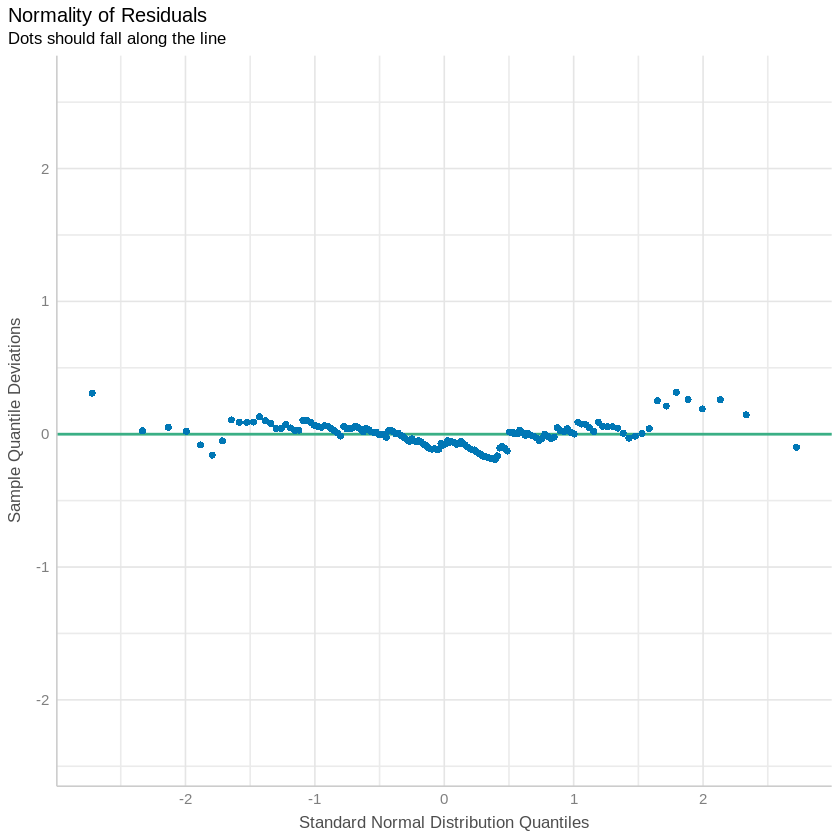

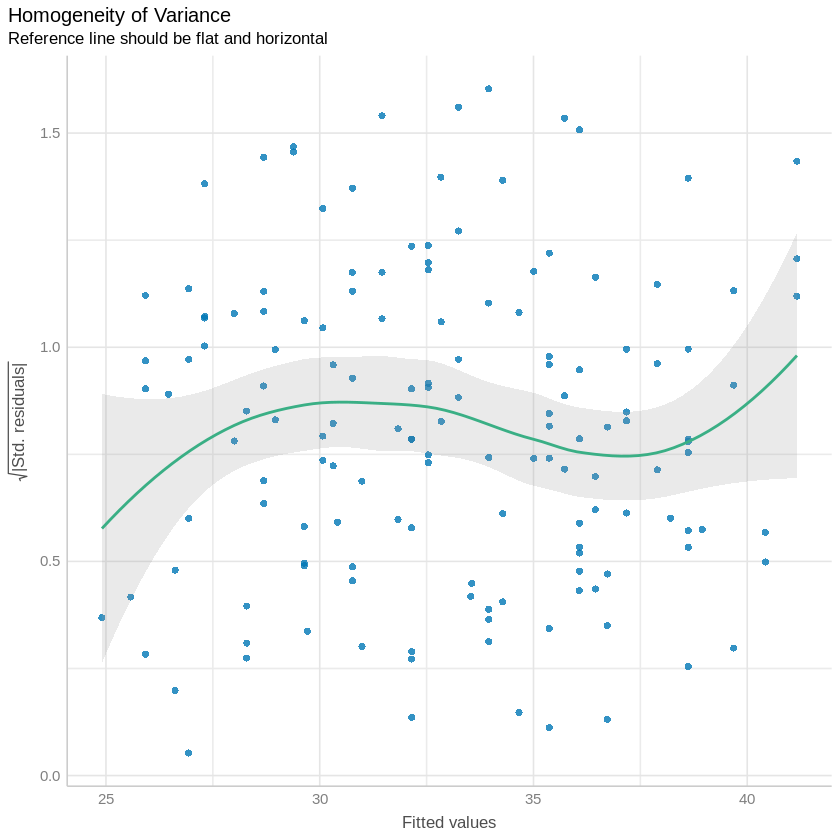

In [9]:
## Check the normality assumption
check_normality(ModCostAge)
check_normality(ModCostAge) %>% plot(type = "density")
check_normality(ModCostAge) %>% plot(type = "qq")

## Check the homoscedasticity assumption
check_heteroscedasticity(ModCostAge)
check_heteroscedasticity(ModCostAge) %>% plot()

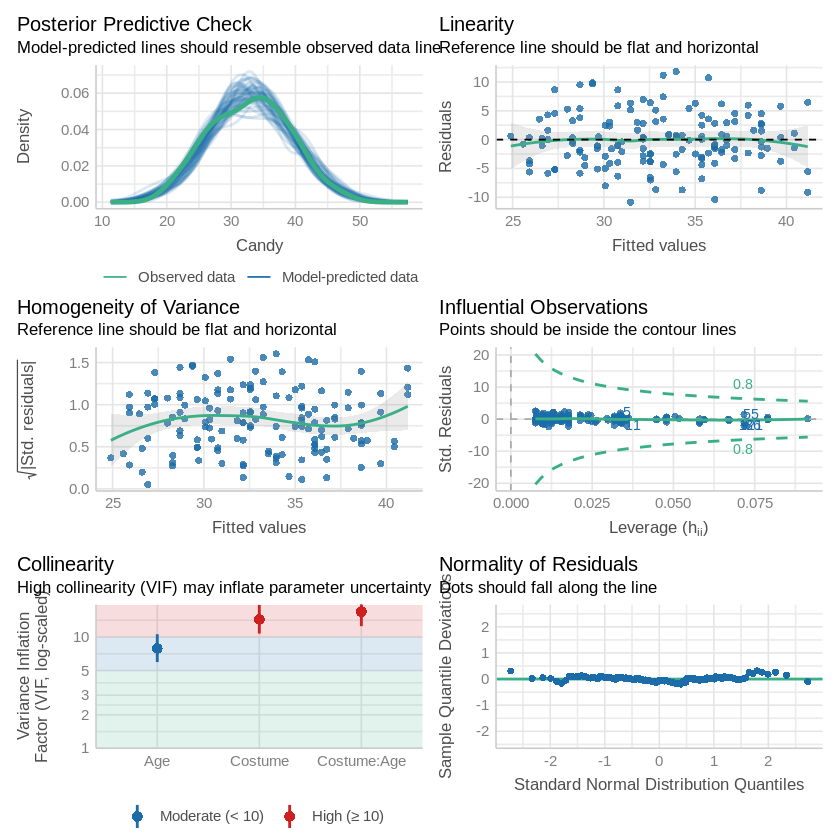

In [10]:
## Visually check all our assumptions at once
check_model(ModCostAge)

# Categorical predictor

Let's add a categorical predictor to our data and see how those types of models look. Here, we will add a binary variable for the location (i.e., city versus rural)

In [11]:
## Create a new object with the new predictor: Location
SpookyData <-
  TrickyData %>%
  arrange(Candy) %>%
  mutate(Location = rep(c("Rural", "City"), each = nrow(TrickyData) / 2),
         Location = as.factor(Location))

## Estimate the model with main effects

Let's estimate the regression model for costumes and location as predictors of candy.

Technically, our equation is as follows: $\hat{y}_i = b_0 + b_1 * Costume + b_2 * Location$

With a categorical predictor, we can make some dummy coding that gets across the same idea: $\hat{y}_i = b_0 + b_1 * Costume + b_2 * Rural$ where $b_0$ is the reference point for when Location = City and Rural is a dummy code that is only equal to 1 or 0.

In [12]:
## Estimate the regression equation/model for costume + location
ModLocation <- lm(Candy ~ Costume + Location, data = SpookyData)

## Return the model parameters for the regression equation
parameters(ModLocation)

## Return the overall model effect size for the regression equation
r2(ModLocation)

Parameter,Coefficient,SE,CI,CI_low,CI_high,t,df_error,p
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
(Intercept),35.0376552,1.0292066,0.95,33.0034700,37.071840,34.043364,145,4.880715e-71
Costume,0.8438081,0.2755924,0.95,0.2991109,1.388505,3.061797,145,2.622768e-03
LocationRural,-8.9257500,0.6545312,0.95,-10.2194045,-7.632095,-13.636859,145,9.088507e-28


# R2 for Linear Regression
       R2: 0.703
  adj. R2: 0.699

## Interpret the regression equation

With out dummy coding variables, we return the following equation for the regression line: $\hat{y}_i = 35.04 + 0.84 * Costume - 8.93 * Rural$

*Intercept* (i.e., $b_0$): When Location is City, we can expect a child to receive about 35.04 pieces of candy.

*Costume Slope* (i.e., $b_1$): For every 1-unit increase in costume ratings, we can expect there to be an _increase_ of 0.84 pieces of candy.

*Location effect [Rural]* (i.e., $b_2$): When location is rural, we can expect the child to receive about 8.93 _fewer_ pieces of candy.

*Effect size* (i.e., $R^2$): The costume ratings and location collectively account for about 70% (i.e., $R^2 = .70$) of the variability in the amount of candy a child collects.

## Visualize these numbers

The plots below essentially have 2 regression equations, 1 for each level of Location.

Location = "City": $\hat{y}_i = 35.04 + 0.84 * Costume$

Location = "Rural": $\hat{y}_i = 35.04 - 8.93 + 0.84 * Costume = 26.11 + 0.84 * Costume$

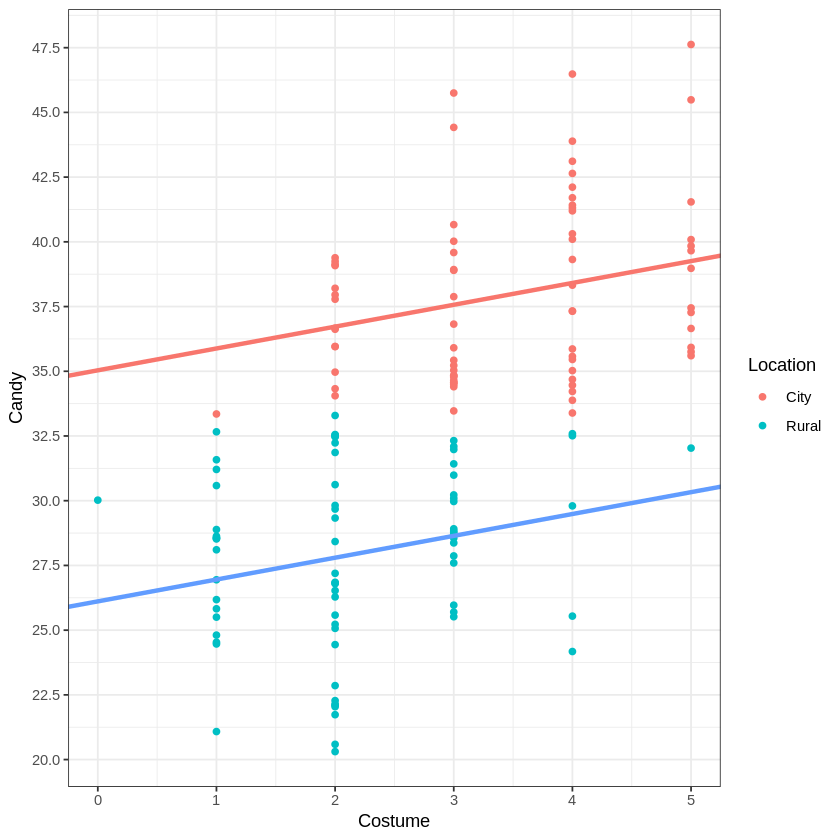

In [14]:
## Plot the regression lines for each level of the categorical predictor
SpookyData %>%
  ggplot(aes(x = Costume, y = Candy, color = Location)) +
  geom_point() +
  geom_abline(intercept = coef(ModLocation)[1],
              slope = coef(ModLocation)[2], color = "#F8766D", linewidth = 1.25) +
  geom_abline(intercept = coef(ModLocation)[1] + coef(ModLocation)[3],
              slope = coef(ModLocation)[2], color = "#619CFF", linewidth = 1.25) +
  scale_y_continuous(breaks = seq(20, 50, by = 2.5)) +
  theme_bw()

According to the totally fake data I made up, children can maximize their candy and cavities by wearing cool costumes in the city.